In [27]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("train_ctrUa4K.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.drop(labels="Loan_ID",inplace=True,axis=1)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Replacing na values

In [5]:
train_data["Gender"].fillna(value="Male",inplace=True)
train_data["Married"].fillna(value="Yes",inplace=True)
train_data["Dependents"].fillna(value="0",inplace=True)
train_data["Self_Employed"].fillna(value="No",inplace=True)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Encoding Cat Features

In [7]:
# get the category columns
category_columns=list(train_data.select_dtypes(include='object').columns)

In [8]:
category_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
#data encoding
train_data[category_columns[0]]          =train_data[category_columns[0]].replace({"Female" : 0 ,"Male" : 1})
train_data[category_columns[1]]          =train_data[category_columns[1]].replace({"No":1,"Yes":2})
train_data[category_columns[2]]          =train_data[category_columns[2]].replace({'0':0,'1':1,'2':2,'3+':3})
train_data[category_columns[3]]          =train_data[category_columns[3]].replace({"Graduate" : 1,"Not Graduate" : 2})
train_data[category_columns[4]]          =train_data[category_columns[4]].replace({"No":1,"Yes":2})
train_data[category_columns[5]]          =train_data[category_columns[5]].replace({'Urban':1,'Rural':2,'Semiurban':3})
train_data[category_columns[6]]          =train_data[category_columns[6]].replace({"Y":1,"N":0})

In [11]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,1,5849,0.0,NaN,360.0,1.0,1,1
1,1,2,1,1,1,4583,1508.0,128.0,360.0,1.0,2,0
2,1,2,0,1,2,3000,0.0,66.0,360.0,1.0,1,1
3,1,2,0,2,1,2583,2358.0,120.0,360.0,1.0,1,1
4,1,1,0,1,1,6000,0.0,141.0,360.0,1.0,1,1


# EDA (Exproratory Data Analysis)

## Numerical cols Distribution

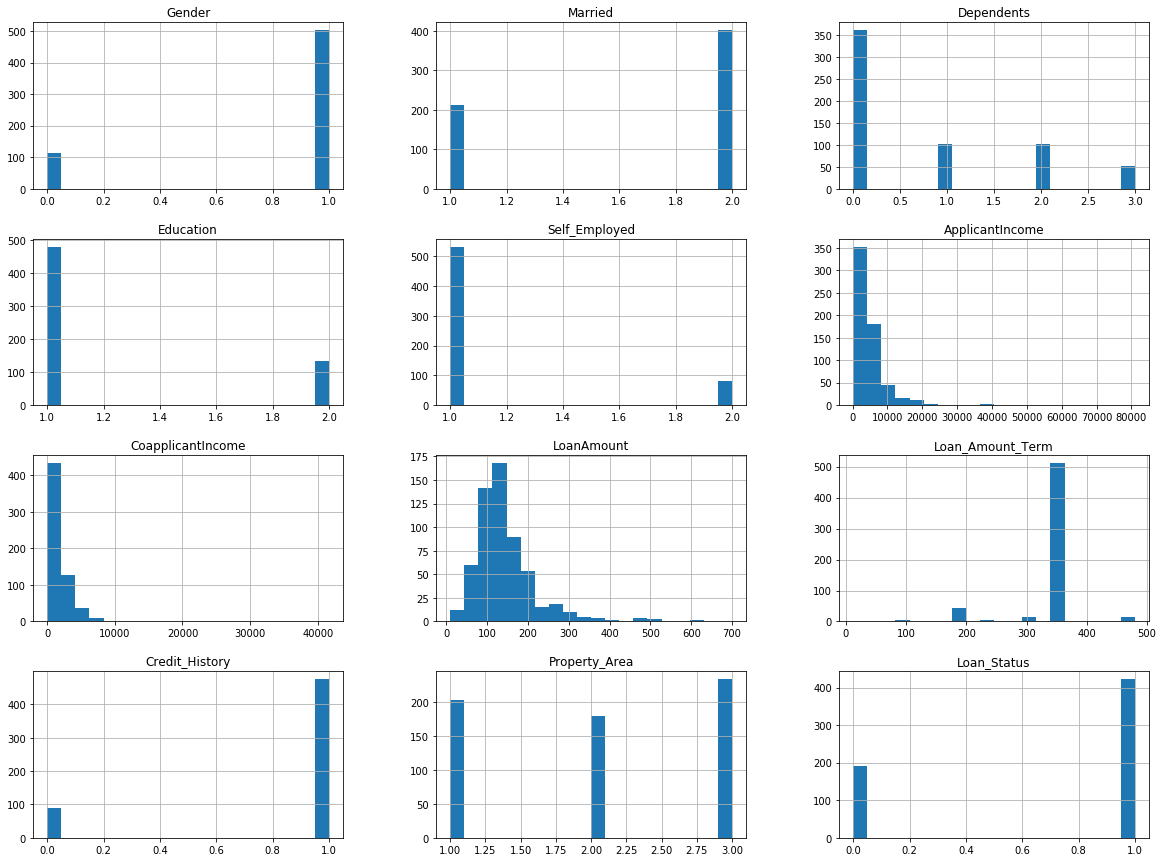

In [12]:
train_data.hist(bins=20,figsize=(20,15))
plt.show()

## Scatter plot

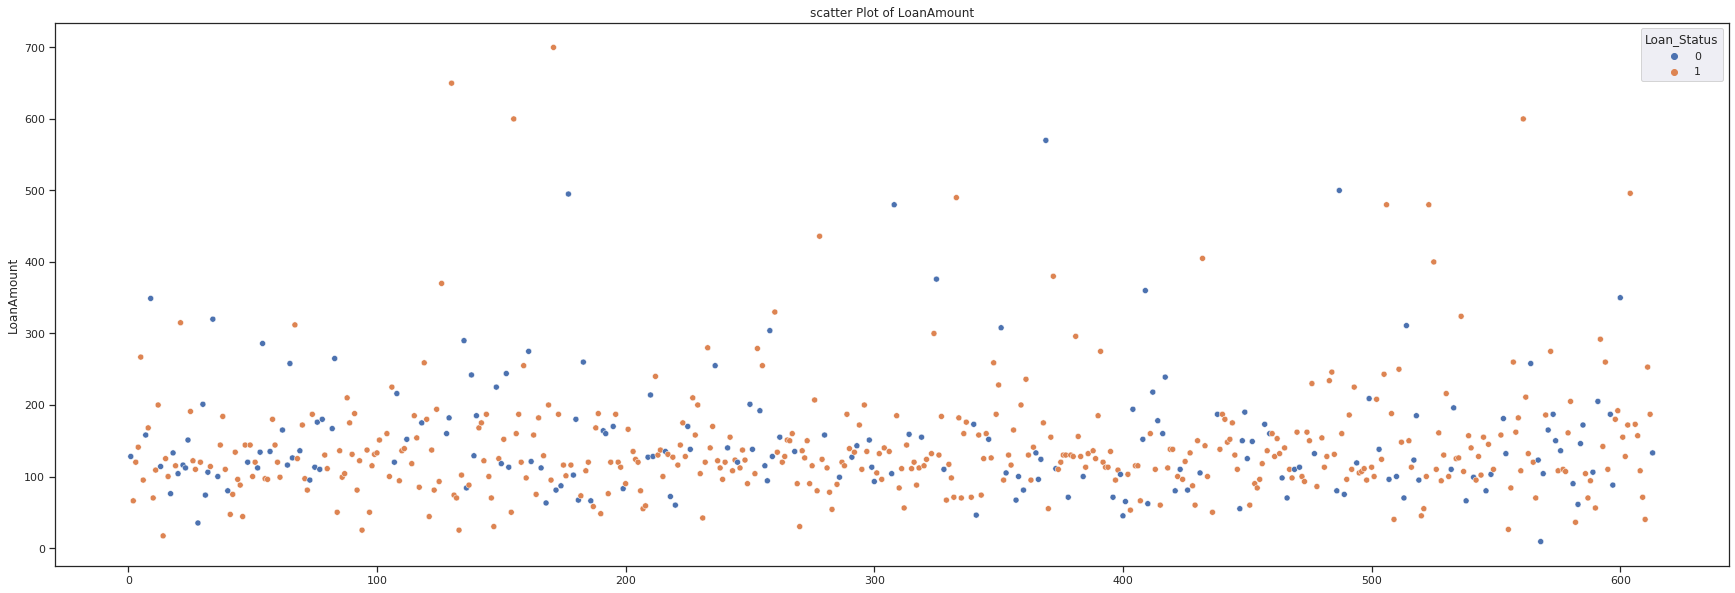

In [18]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["LoanAmount"],hue=train_data['Loan_Status'])
plt.title("scatter Plot of LoanAmount");

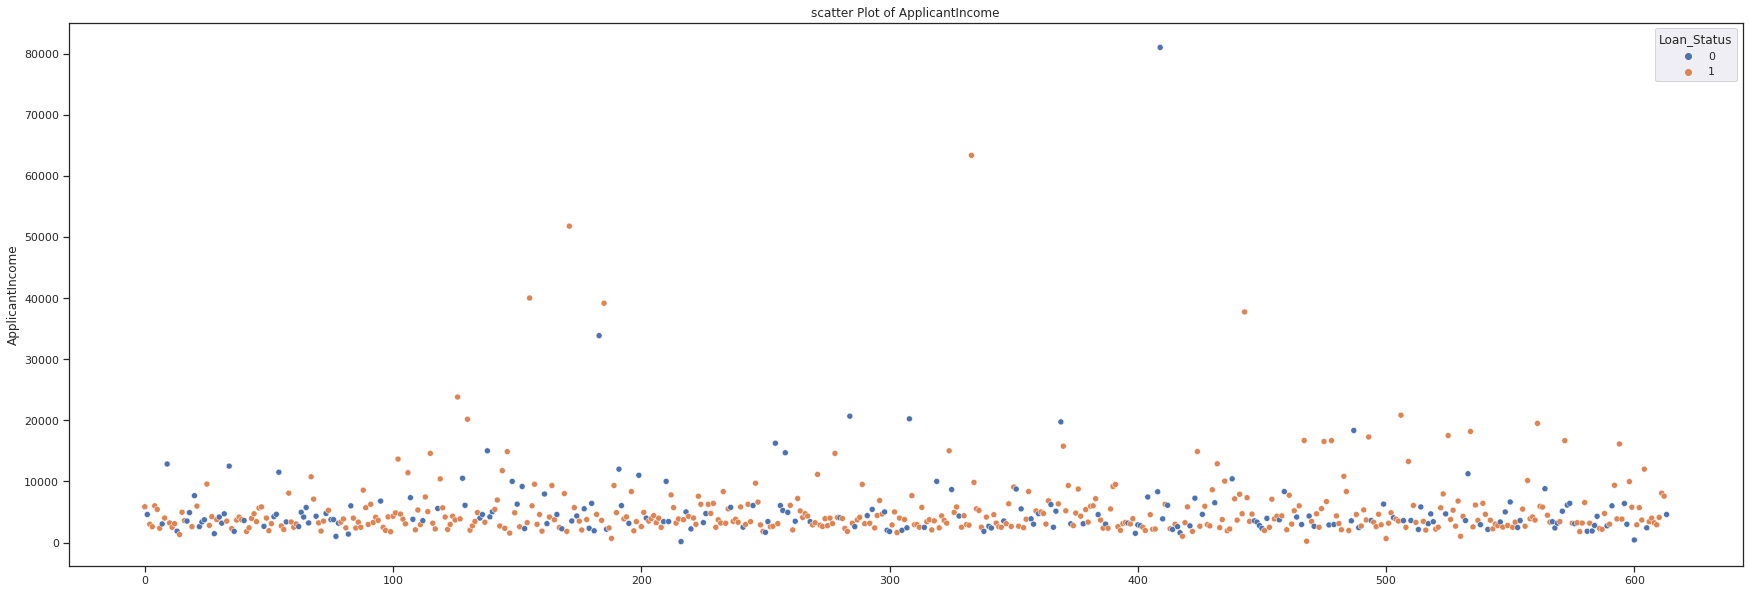

In [19]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["ApplicantIncome"],hue=train_data['Loan_Status'])
plt.title("scatter Plot of ApplicantIncome");

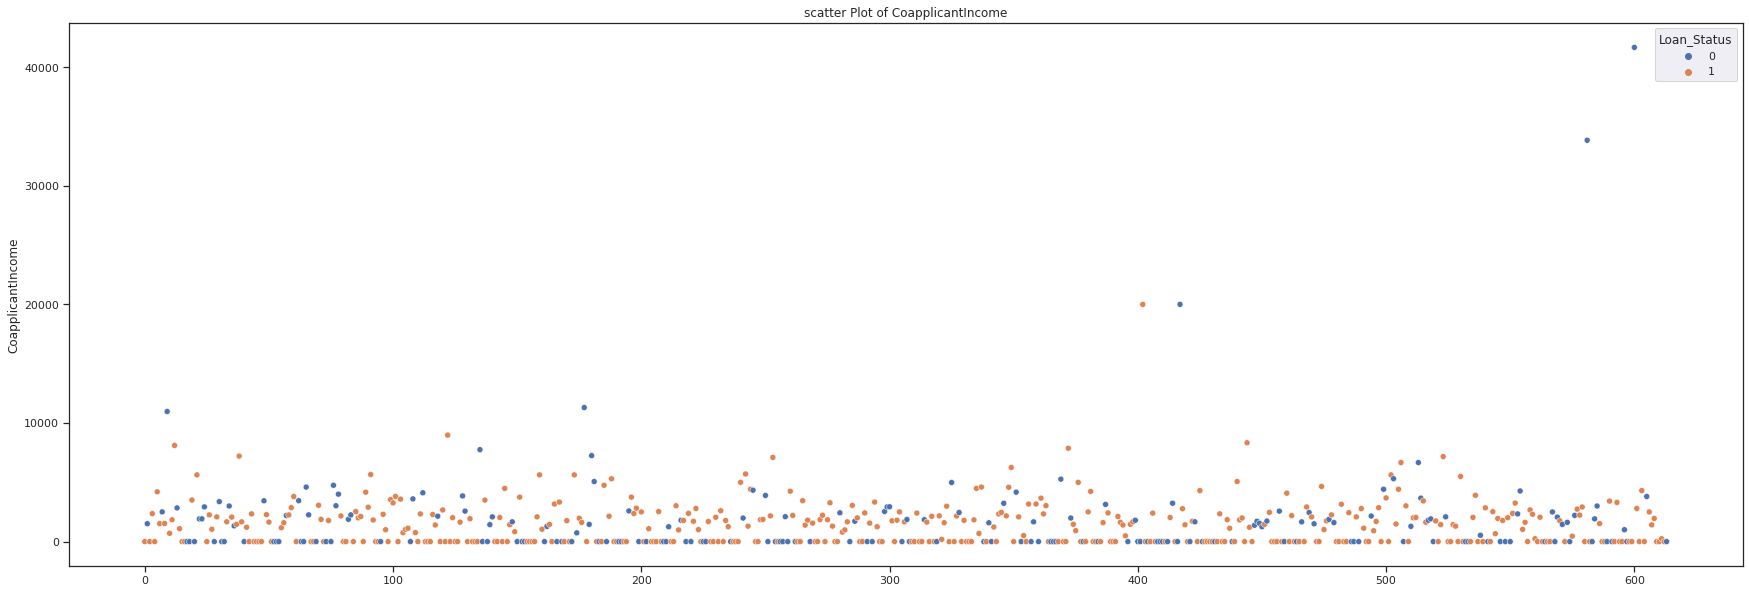

In [24]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["CoapplicantIncome"],hue=train_data['Loan_Status'])
plt.title("scatter Plot of CoapplicantIncome");

## Plotting the distributions of all the features

<Figure size 432x288 with 0 Axes>

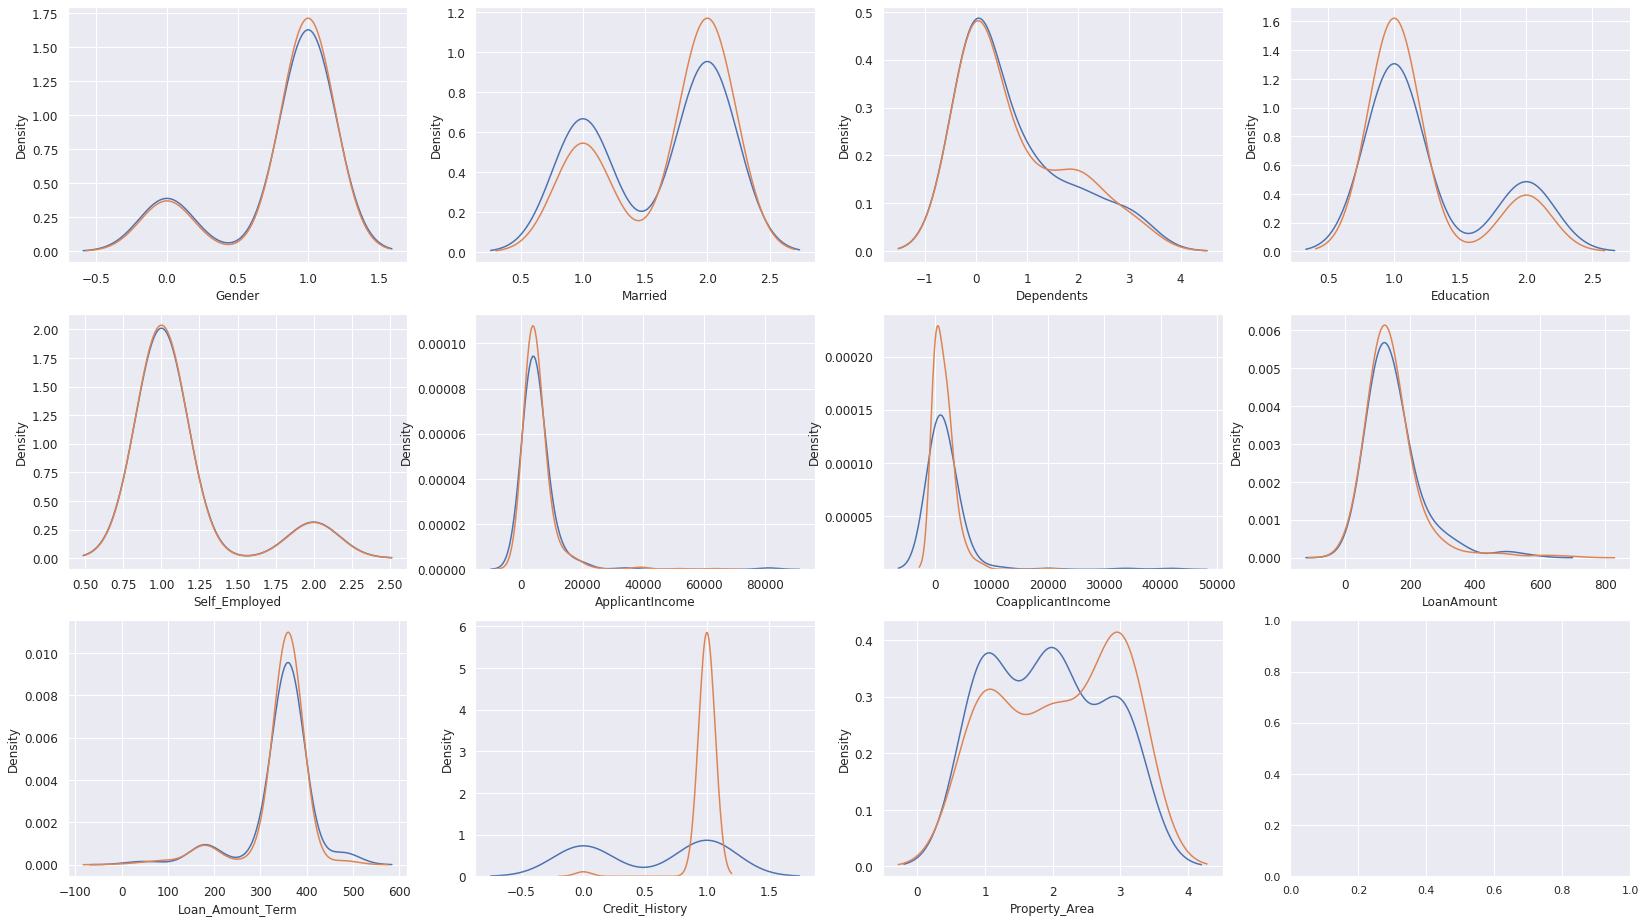

In [28]:
# Plotting the distributions of all the features
# Plotting numerical variable in displot to visualise the distribution
num_cols=train_data.select_dtypes(include='number')
var=list(train_data.columns.values)
var.remove("Loan_Status")
i=0
t0=train_data.loc[train_data["Loan_Status"]==0]
t1=train_data.loc[train_data["Loan_Status"]==1]

plt.figure()
fig,ax=plt.subplots(3,4,figsize=(28,16))

for feature in var:
    i+=1
    plt.subplot(3,4,i)
    sns.kdeplot(t0[feature],bw=0.5,label="0")
    sns.kdeplot(t1[feature],bw=0.5,label="1")
    plt.xlabel(feature,fontsize=12)
    locs,labels=plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    
plt.show();
    

In [22]:
# we will remove Gender,Self_employed

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']